In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def plot_digits(instances, images_per_row=8, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [3]:
generator = keras.models.load_model('mnist_generator_epoch10')

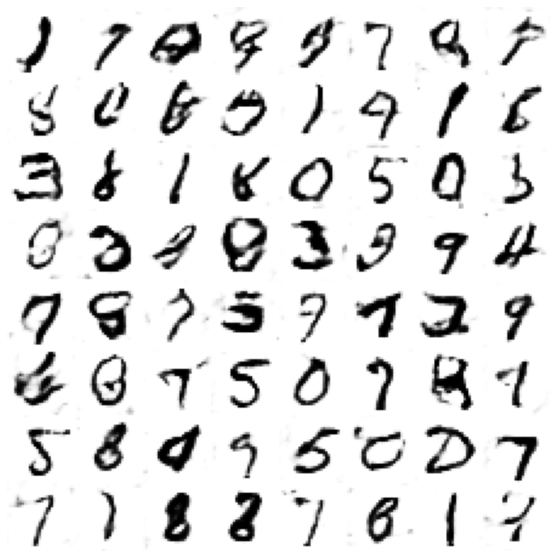

In [4]:
noise = tf.random.normal(shape=[64, 100])
images = generator.predict(noise)
images = (images.reshape(64, 28, 28) + 1.0) * 0.5 * 255.0
plt.figure(figsize=(10,10))
plot_digits(images)